In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from network import *
from layers import *

In [2]:
def preprocess_mnist(X: np.ndarray, y: np.ndarray):
    X = X.reshape(X.shape[0], 1, 28 * 28)
    X = X.astype('float32')
    X /= 255
    y = to_categorical(y)
    return X, y


(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train, y_train = preprocess_mnist(X_train, y_train)
X_test, y_test = preprocess_mnist(X_test, y_test)

Epoch 1/10  MSE=0.16622505978437271 Time=3.081382583000959s
Epoch 2/10  MSE=0.08367627585700846 Time=2.9236007219988096s
Epoch 3/10  MSE=0.06742411160983174 Time=2.727350204000686s
Epoch 4/10  MSE=0.059389567991299644 Time=3.0402543439995497s
Epoch 5/10  MSE=0.05437115106100409 Time=2.736704030998226s
Epoch 6/10  MSE=0.050721968181486866 Time=2.7447908869980893s
Epoch 7/10  MSE=0.04772547842189239 Time=2.80064852200303s
Epoch 8/10  MSE=0.04526630381802227 Time=2.796808212999167s
Epoch 9/10  MSE=0.04318547863316305 Time=3.0964441479991365s
Epoch 10/10  MSE=0.04141429401927863 Time=2.8775130920002994s


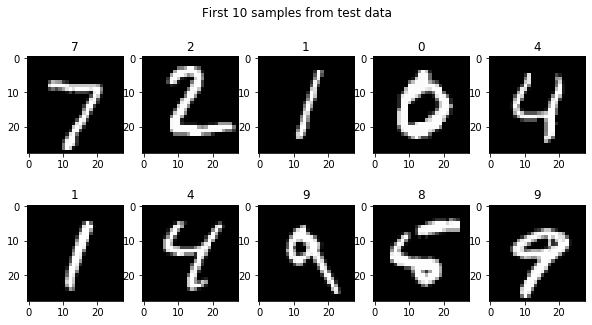

In [3]:
net = Network(epochs=10, learning_rate=0.1)
net.add_layer(FCLayer(28*28, 100))
net.add_layer(ActivationLayer("tanh"))
net.add_layer(FCLayer(100, 10))
net.add_layer(ActivationLayer("tanh"))

net.fit(X_train[:10000], y_train[:10000])

labels = net.predict(X_test[:10])
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
fig.suptitle("First 10 samples from test data")
for i in range(10):
    ax = axes[i // 5][i % 5]
    sample = (X_test[i] * 255).astype(np.uint8).reshape(28, 28)
    ax.imshow(sample, cmap='gray')
    ax.set_title(str(np.argmax(labels[i])))

plt.show()
